# Algoritmos de Recomendación e Introducción al Aprendizaje Profundo

1. Introducción y contexto (10 minutos)
Objetivo:

Establecer el marco de trabajo para los sistemas de recomendación y su relación con el aprendizaje profundo.

Contenido:

¿Qué son los algoritmos de recomendación?

Definición: Métodos que sugieren productos o contenidos a los usuarios basados en datos de comportamiento, preferencias o contexto.

Ejemplos: Netflix recomendando series, Amazon sugiriendo productos.

Tipos de recomendaciones que veremos:

Filtrado colaborativo.

Recomendaciones basadas en contenido.

Modelos híbridos.

Definición y ejemplos.

![image.png](https://www.cronista.com/files/image/427/427931/61f4c129b15c1.jpg)

## Tipos de recomendación
![image-2.png](https://www.juanbarrios.com/wp-content/uploads/2022/03/sistema-de-recomendacion.png)

![image.png](https://www.statdeveloper.com/wp-content/uploads/2020/03/colaborativo-2-1024x529.png)

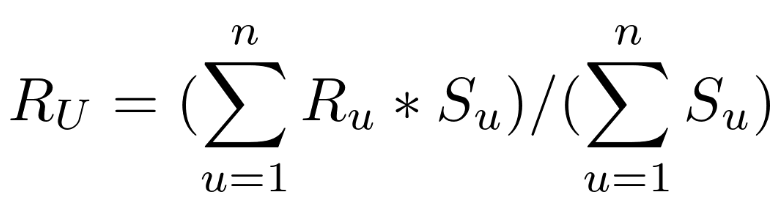

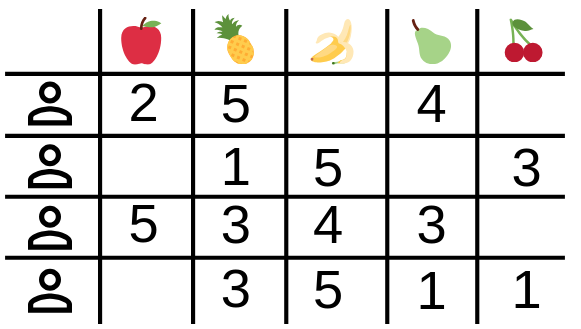

In [1]:
# Importar las librerías
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import KFold
import pandas as pd

In [2]:
# Cargar el dataset MovieLens
data = Dataset.load_builtin('ml-100k')

In [3]:
df_pru = pd.DataFrame(data.raw_ratings)

In [4]:
df_pru.head()

,0,1,2,3
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [5]:
df_pru.columns

RangeIndex(start=0, stop=4, step=1)

In [6]:
df_pru[df_pru[0]=='196']

,0,1,2,3
0,196,242,3.0,881250949
940,196,393,4.0,881251863
1133,196,381,4.0,881251728
1812,196,251,3.0,881251274
1896,196,655,5.0,881251793
2374,196,67,5.0,881252017
6910,196,306,4.0,881251021
7517,196,238,4.0,881251820
7842,196,663,5.0,881251911
10017,196,111,4.0,881251793


In [7]:
# Dividir los datos en entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.25, random_state=123)

In [8]:
print(trainset.n_items)

1646


In [9]:
# Definir el algoritmo (KNN básico)
algo = KNNBasic()

In [10]:
# Entrenar el algoritmo
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [11]:
algo.sim_options

{'user_based': True}

In [12]:
# Hacer predicciones
predictions = algo.test(testset)

In [13]:
predictions

[Prediction(uid='798', iid='480', r_ui=3.0, est=4.2780779139572065, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='296', iid='462', r_ui=4.0, est=3.992136271708232, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='653', iid='258', r_ui=3.0, est=4.043071839323004, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='883', iid='239', r_ui=3.0, est=3.59498512409418, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='272', iid='187', r_ui=5.0, est=4.520558641683631, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='883', iid='185', r_ui=5.0, est=4.1786722566246, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='653', iid='238', r_ui=1.0, est=3.7129483550100097, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='524', iid='79', r_ui=4.0, est=3.8829752017205568, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='7', iid='93', r_ui=5.0, est=3.67

In [14]:
# Evaluar la precisión
accuracy.rmse(predictions)

RMSE: 0.9763


0.9762605158799611

In [15]:
algo.predict(568, 519)

Prediction(uid=568, iid=519, r_ui=None, est=3.5331333333333332, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

Recomendación basada en contenido:

Definición: Recomendaciones basadas en la similitud entre los ítems que el usuario ha consumido previamente.

Ejemplo práctico en Python:

Utilizando características de películas (género, director) para hacer recomendaciones similares.

In [16]:
# Ejemplo de recomendación basada en contenido utilizando similitud de coseno
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
# Crear un dataframe ficticio con características de películas
data = {'Película': ['A', 'B', 'C'],
        'Acción': [1, 0, 1],
        'Comedia': [0, 1, 0],
        'Drama': [1, 1, 0]}

df = pd.DataFrame(data)

In [18]:
df.head()

,Película,Acción,Comedia,Drama
0,A,1,0,1
1,B,0,1,1
2,C,1,0,0


In [19]:
# Calcular la similitud de coseno entre las películas
cos_sim = cosine_similarity(df[['Acción', 'Comedia', 'Drama']])

In [20]:
# Mostrar similitudes
print(cos_sim)

[[1.         0.5        0.70710678]
 [0.5        1.         0.        ]
 [0.70710678 0.         1.        ]]
